In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

## Overview
This notebook takes in a text file in the same directory called data.txt with each line being CSV separated data for the XYZ axes of a magnetometer's raw data.  It fits a sphere to those points and finds the center offset which can be used for calibration.

For ease and educationalism I'm just using the code from this blog: https://jekel.me/2015/Least-Squares-Sphere-Fit/ which finds the center

In [18]:
with open("data.txt", "r") as f:
    lines = f.readlines()
points = [[float(f) for f in p.split(",")] for p in lines]
points_arr = np.array(points)

In [19]:
def sphereFit(spX, spY, spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX), 4))
    A[:,0] = spX * 2
    A[:,1] = spY * 2
    A[:,2] = spZ * 2
    A[:,3] = 1

    #   Assemble the f matrix
    f = np.zeros((len(spX), 1))
    f[:, 0] = (spX * spX) + (spY * spY) + (spZ * spZ)
    C, residules, rank, singval = np.linalg.lstsq(A, f)

    #   solve for the radius
    t = (C[0] * C[0])+(C[1] * C[1])+(C[2] * C[2]) + C[3]
    radius = np.sqrt(t)

    return radius, C[0], C[1], C[2]

/tmp/ipykernel_738983/1483968729.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residules, rank, singval = np.linalg.lstsq(A, f)


<IPython.core.display.Javascript object>


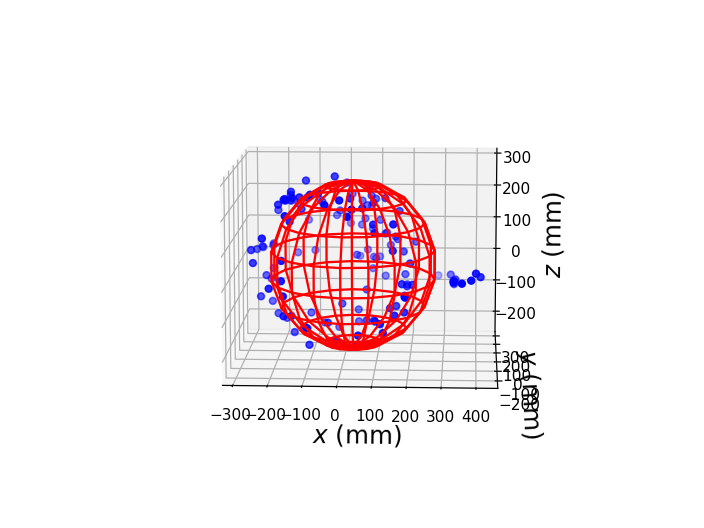

Offsets and radius are: x: [28.32173554], y: [9.90365822], z: [20.75499084], r: [249.3413705]


In [20]:
#   3D plot of Sphere

r, x0, y0, z0 = sphereFit(points_arr[:, 0], points_arr[:, 1], points_arr[:, 2])
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x=np.cos(u)*np.sin(v)*r
y=np.sin(u)*np.sin(v)*r
z=np.cos(v)*r
x = x + x0
y = y + y0
z = z + z0

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_wireframe(x, y, z, color="r")
ax.set_xlabel('$x$ (mm)',fontsize=16)
ax.set_ylabel('\n$y$ (mm)',fontsize=16)
zlabel = ax.set_zlabel('\n$z$ (mm)',fontsize=16)

ax.scatter(points_arr[:, 0], points_arr[:, 1], points_arr[:, 2], zdir='z', s=20, c='b',rasterized=True)
plt.show()

print(f"Offsets and radius are: x: {x0}, y: {y0}, z: {z0}, r: {r}")